In [1]:
# -------------------------------------------------
# Install Streamlit and Cloudflared
# -------------------------------------------------
import os
import time

# Install Streamlit
os.system('pip install -q streamlit')

# Install Cloudflared
os.system('wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb')
os.system('dpkg -i cloudflared-linux-amd64.deb')

# -------------------------------------------------
# Download sample dataset manually
# -------------------------------------------------
sample_data_url = "https://people.sc.fsu.edu/~jburkardt/data/csv/hw_200.csv"  # sample CSV
os.system(f"wget -O sample_data.csv {sample_data_url}")

# -------------------------------------------------
# Create app.py
# -------------------------------------------------
app_code = '''
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

st.set_page_config(page_title="Customer Segmentation & Anomaly Detection", page_icon="📊", layout="wide")

st.title("📊 Customer Segmentation and Anomaly Detection App")

st.sidebar.header("📥 Load Dataset")

data_option = st.sidebar.radio(
    "Choose data source",
    ("Use Sample Data", "Upload Your Own CSV")
)

if data_option == "Use Sample Data":
    df = pd.read_csv("sample_data.csv")
    st.success("✅ Sample dataset loaded successfully!")
else:
    uploaded_file = st.sidebar.file_uploader("Upload your CSV file", type=["csv"])
    if uploaded_file is not None:
        df = pd.read_csv(uploaded_file)
        st.success("✅ File uploaded successfully!")
    else:
        st.warning("⚠️ Please upload a CSV file to continue.")
        st.stop()

st.subheader("🔍 Preview of Data")
st.dataframe(df)

st.sidebar.header("⚙️ Clustering Settings")

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

features = st.sidebar.multiselect("Select features for clustering", numeric_cols, default=numeric_cols)

n_clusters = st.sidebar.slider("Number of clusters", 2, 10, 3)

if st.sidebar.button("Run Segmentation"):
    if len(features) >= 2:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        df['Cluster'] = kmeans.fit_predict(df[features])

        st.success("✅ Clustering Done!")

        st.subheader("📈 Cluster Visualization")
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.scatterplot(x=df[features[0]], y=df[features[1]], hue=df['Cluster'], palette="tab10", s=100)
        plt.xlabel(features[0])
        plt.ylabel(features[1])
        plt.title("Customer Segments")
        st.pyplot(fig)

        st.subheader("🚨 Anomaly Detection")
        iso = IsolationForest(contamination=0.05, random_state=42)
        df['Anomaly'] = iso.fit_predict(df[features])
        anomalies = df[df['Anomaly'] == -1]

        st.write(f"Number of anomalies detected: {len(anomalies)}")
        st.dataframe(anomalies)

        st.subheader("🗂 Full Data with Clusters & Anomalies")
        st.dataframe(df)

        # Download button
        csv = df.to_csv(index=False).encode('utf-8')
        st.download_button("Download Result CSV", data=csv, file_name='segmentation_anomalies.csv', mime='text/csv')

    else:
        st.error("❌ Please select at least 2 features for clustering.")

else:
    st.info("👈 Adjust settings and click 'Run Segmentation' to start.")

st.sidebar.markdown("---")
st.sidebar.write("Made with ❤️ using Streamlit")
'''

# Save the app.py file
with open('app.py', 'w') as f:
    f.write(app_code)

# -------------------------------------------------
# Run Streamlit App
# -------------------------------------------------
# Kill any existing streamlit
os.system('pkill streamlit')

# Start app
os.system('streamlit run app.py &')

# -------------------------------------------------
# Create Cloudflared Tunnel
# -------------------------------------------------
time.sleep(5)  # wait for streamlit to boot

# Create tunnel
!cloudflared tunnel --url http://localhost:8501


UnicodeEncodeError: 'charmap' codec can't encode character '\U0001f4ca' in position 293: character maps to <undefined>

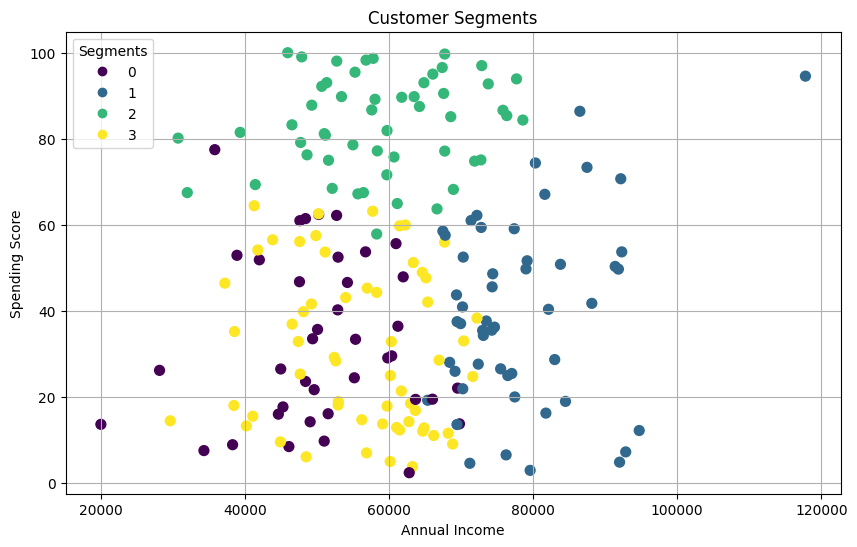


--- Anomalies Detected ---
           Age  Annual Income  Spending Score
9    46.510721  117790.972360       94.531807
20   57.587785   94719.878500       12.242202
37   18.000000   62796.814722        2.439922
62   26.723980   20000.000000       13.676538
84   30.298077   91995.500620        4.891902
85   33.978915   30718.683007       80.141629
113  69.558905   72202.644540       38.351132
125  66.285468   41787.170808       54.173548
179  70.000000   47875.525720       99.006063
182  27.149290   28141.564135       26.209425
Total anomalies found: 10

Enter new customer details:
